Analyzing how well the median values of the posterior distribution can recover some of the input parameters.

Normal FoV and lensing models with external shear.

Model1 - 35 bins; Model2 - 15 bins; Model3 - 55 bins.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import re
from astropy.io import fits

In [2]:
data_path  = "/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/"


subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)

## JAM models

### DM parameters

In [5]:
Model1_rs = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc
Model2_rs = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc
Model3_rs = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc

Model1_slope = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc
Model2_slope = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc
Model3_slope = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc


rs      = np.empty([Nsubhalos])  # True scale radius in arcsec
rs_err  = np.empty([Nsubhalos,2])  # 1\sigma error

slope   = np.empty([Nsubhalos])  # True slope in arcsec
slope_err  = np.empty([Nsubhalos,2])  # 1\sigma error

In [6]:
for i, s in enumerate(subhalos):
    
    ## Reading the data
    with open("{}/TNG50-1-snap84-subhalo{}/dm/dm_nonlinear_rst.json".format(data_path,s)) as f:
        DM = json.load(f)
        f.close()
    
    rs[i]     = DM["r_s"][1]
    rs_err[i] = np.diff(DM["r_s"])
    
    slope[i]     = DM["gamma"][1]
    slope_err[i] = np.diff(DM["gamma"])
    
    #####################################
    
    #Model1
    with open("./{}/model1/normal/JAM/results.rst".format(s), 'r') as file_JAM1:
        # Read all lines
        JAM1 = file_JAM1.readlines()
    JAM1 = JAM1[4:]                       # Skip the header

        # Scale radius
    Model1_rs[i][0] = JAM1[-2].split()[1]   # Median
    Model1_rs[i][1], Model1_rs[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM1[-2].split()[2]) # lower and upper limits
    
        # Slope
    Model1_slope[i][0] = JAM1[-1].split()[1]   # Median
    Model1_slope[i][1], Model1_slope[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM1[-1].split()[2]) # lower and upper limits

    #Model2
    with open("./{}/model2/normal/JAM/results.rst".format(s), 'r') as file_JAM2:
        # Read all lines
        JAM2 = file_JAM2.readlines()
    JAM2 = JAM2[4:]                       # Skip the header

        # Scale radius
    Model2_rs[i][0] = JAM2[-2].split()[1]   # Median
    Model2_rs[i][1], Model2_rs[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM2[-2].split()[2]) # lower and upper limits
    
        # Slope
    Model2_slope[i][0] = JAM2[-1].split()[1]   # Median
    Model2_slope[i][1], Model2_slope[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM2[-1].split()[2]) # lower and upper limits

    
    #Model3
    with open("./{}/model3/normal/JAM/results.rst".format(s), 'r') as file_JAM3:
        # Read all lines
        JAM3 = file_JAM3.readlines()
    JAM3 = JAM3[4:]                       # Skip the header

        # Scale radius
    Model3_rs[i][0] = JAM3[-2].split()[1]   # Median
    Model3_rs[i][1], Model3_rs[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM3[-2].split()[2]) # lower and upper limits
    
        # Slope
    Model3_slope[i][0] = JAM3[-1].split()[1]   # Median
    Model3_slope[i][1], Model3_slope[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM3[-1].split()[2]) # lower and upper limits



In [7]:
def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

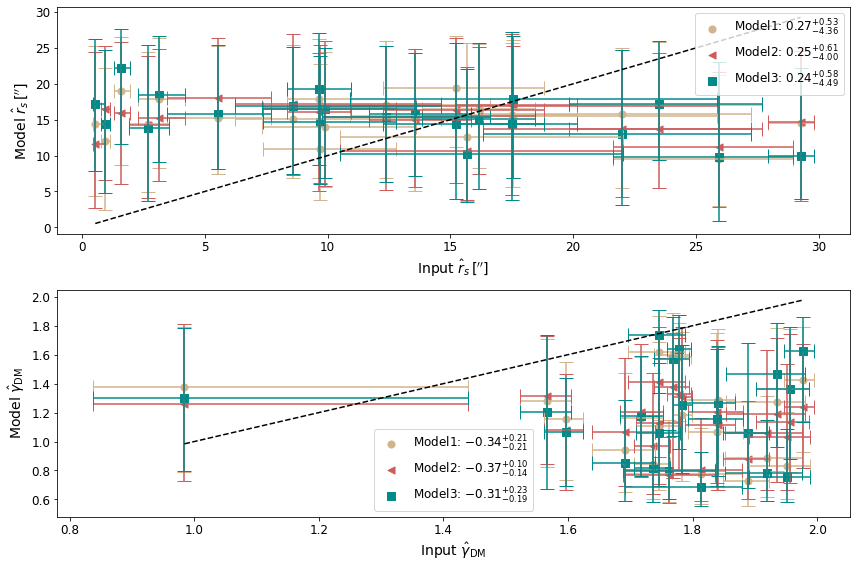

In [8]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Adicionar os dados aos subplots
    #  DM scale radius

#Model1
m, hi, lo = median_hi_lo( (Model1_rs[:,0] - rs)/rs )    
axs[0].scatter(x=rs, y=Model1_rs[:,0], s=50, color="tan", marker="o",
                      label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0].errorbar(x=rs, y=Model1_rs[:,0], yerr=abs(Model1_rs[:,1:3].T), xerr=abs(rs_err.T),
                      ls="None", color="tan", capsize=7)

#Model2
m, hi, lo = median_hi_lo( (Model2_rs[:,0] - rs)/rs )    
axs[0].scatter(x=rs, y=Model2_rs[:,0], s=50, color="indianred", marker="<",
                      label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0].errorbar(x=rs, y=Model2_rs[:,0], yerr=abs(Model2_rs[:,1:3].T), xerr=abs(rs_err.T),
                      ls="None", color="indianred", capsize=7)

#Model3
m, hi, lo = median_hi_lo( (Model3_rs[:,0] - rs)/rs )    
axs[0].scatter(x=rs, y=Model3_rs[:,0], s=50, color="darkcyan", marker="s",
                      label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0].errorbar(x=rs, y=Model3_rs[:,0], yerr=abs(Model3_rs[:,1:3].T), xerr=abs(rs_err.T),
                      ls="None", color="darkcyan", capsize=7)

axs[0].set_ylabel(r"Model $\hat{r}_s \, ['']$", size=14)
axs[0].set_xlabel(r"Input $\hat{r}_s \, ['']$", size=14)
axs[0].legend(fontsize=12)
r = np.linspace(rs.min(), rs.max())
axs[0].plot(r, r, color="black", linestyle="--")

    # DM slope
    
#Model1
m, hi, lo = median_hi_lo( (Model1_slope[:,0] - slope)/slope )    
axs[1].scatter(x=slope, y=Model1_slope[:,0], s=50, color="tan", marker="o",
                      label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1].errorbar(x=slope, y=Model1_slope[:,0], yerr=abs(Model1_slope[:,1:3].T), xerr=abs(slope_err.T),
                      ls="None", color="tan", capsize=7)

#Model2
m, hi, lo = median_hi_lo( (Model2_slope[:,0] - slope)/slope )    
axs[1].scatter(x=slope, y=Model2_slope[:,0], s=50, color="indianred", marker="<",
                      label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1].errorbar(x=slope, y=Model2_slope[:,0], yerr=abs(Model2_slope[:,1:3].T), xerr=abs(slope_err.T),
                      ls="None", color="indianred", capsize=7)

#Model3
m, hi, lo = median_hi_lo( (Model3_slope[:,0] - slope)/slope )    
axs[1].scatter(x=slope, y=Model3_slope[:,0], s=50, color="darkcyan", marker="s",
                      label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1].errorbar(x=slope, y=Model3_slope[:,0], yerr=abs(Model3_slope[:,1:3].T), xerr=abs(slope_err.T),
                      ls="None", color="darkcyan", capsize=7)

axs[1].set_ylabel(r"Model $\hat{\gamma}_{\rm DM}$", size=14)
axs[1].set_xlabel(r"Input $\hat{\gamma}_{\rm DM}$", size=14)
axs[1].legend(fontsize=12)
r = np.linspace(slope.min(), slope.max())
axs[1].plot(r, r, color="black", linestyle="--")


# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

## Stellar parameters

In [9]:
Model1_ml = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc
Model2_ml = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc
Model3_ml = np.empty([Nsubhalos, 3])   # Median, lower unc, upper unc

ml     = np.empty([Nsubhalos])         # True ML

In [10]:
model_path = "./"
data_path  = "/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/"

for i, s in enumerate(subhalos):
    
    ## Reading the data

    log_img  = fits.open("{}/TNG50-1-snap84-subhalo{}/imgs/log_img.fits".format(data_path,s))[1].data
    ml[i]    = log_img["M/L"]
    
    #Model1
    with open("./{}/model1/normal/JAM/results.rst".format(s), 'r') as file_JAM1:
        # Read all lines
        JAM1 = file_JAM1.readlines()
    JAM1 = JAM1[4:]                       # Skip the header

        # ML
    Model1_ml[i][0] = JAM1[2].split()[1]   # Median
    Model1_ml[i][1], Model1_ml[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM1[2].split()[2]) # lower and upper limits
    
    #Model2
    with open("./{}/model2/normal/JAM/results.rst".format(s), 'r') as file_JAM2:
        # Read all lines
        JAM2 = file_JAM2.readlines()
    JAM2 = JAM2[4:]                       # Skip the header

        # ML
    Model2_ml[i][0] = JAM2[2].split()[1]   # Median
    Model2_ml[i][1], Model2_ml[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM2[2].split()[2]) # lower and upper limits
    
    
    #Model3
    with open("./{}/model3/normal/JAM/results.rst".format(s), 'r') as file_JAM3:
        # Read all lines
        JAM3 = file_JAM3.readlines()
    JAM3 = JAM3[4:]                       # Skip the header

        # ML
    Model3_ml[i][0] = JAM3[2].split()[1]   # Median
    Model3_ml[i][1], Model3_ml[i][2] = re.findall(r'\((-?\d+\.\d+)\)', JAM3[2].split()[2]) # lower and upper limits



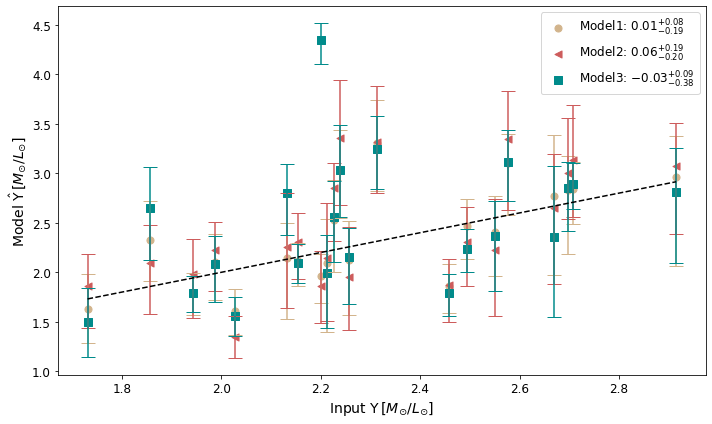

In [18]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Adicionar os dados aos subplots
    # ML
    
#JAM
m, hi, lo = median_hi_lo( (Model1_ml[:,0] - ml)/ml )    
axs.scatter(x=ml, y=Model1_ml[:,0], s=50, color="tan", marker="o",
                      label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs.errorbar(x=ml, y=Model1_ml[:,0], yerr=abs(Model1_ml[:,1:3].T), 
                      ls="None", color="tan", capsize=7)

#Lens
m, hi, lo = median_hi_lo( (Model2_ml[:,0] - ml)/ml )    
axs.scatter(x=ml, y=Model2_ml[:,0], s=50, color="indianred", marker="<",
                      label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs.errorbar(x=ml, y=Model2_ml[:,0], yerr=abs(Model2_ml[:,1:3].T), 
                      ls="None", color="indianred", capsize=7)

#dyLens
m, hi, lo = median_hi_lo( (Model3_ml[:,0] - ml)/ml )    
axs.scatter(x=ml, y=Model3_ml[:,0], s=50, color="darkcyan", marker="s",
                      label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs.errorbar(x=ml, y=Model3_ml[:,0], yerr=abs(Model3_ml[:,1:3].T), 
                      ls="None", color="darkcyan", capsize=7)

axs.set_ylabel(r"Model $\hat{\Upsilon} \, [M_{\odot}/L_{\odot}]$", size=14)
axs.set_xlabel(r"Input $\Upsilon \, [M_{\odot}/L_{\odot}]$", size=14)
axs.legend(fontsize=12)
r = np.linspace(ml.min(), ml.max())
axs.plot(r, r, color="black", linestyle="--")


# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

## Einstein radius

In [19]:
Model1_Re = np.empty([Nsubhalos, 2])   # Median, fractional error
Model2_Re = np.empty([Nsubhalos, 2])   # Median, fractional error
Model3_Re = np.empty([Nsubhalos, 2])   # Median, fractional error


Re  = np.empty([Nsubhalos])  # True Einstein radius
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
            model1 = json.load(f)
            f.close()
    with open("./{}/model2/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
            model2 = json.load(f)
            f.close()
    with open("./{}/model3/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
            model3 = json.load(f)
            f.close()
        
    Model1_Re[i][0] = model1["MMthetaE"]
    Model1_Re[i][1] = model1["DthetaE"]
    
    Model2_Re[i][0] = model2["MMthetaE"]
    Model2_Re[i][1] = model2["DthetaE"]
    
    Model3_Re[i][0] = model3["MMthetaE"]
    Model3_Re[i][1] = model3["DthetaE"]
    
   
    
    Re[i] = model1["MthetaE"]

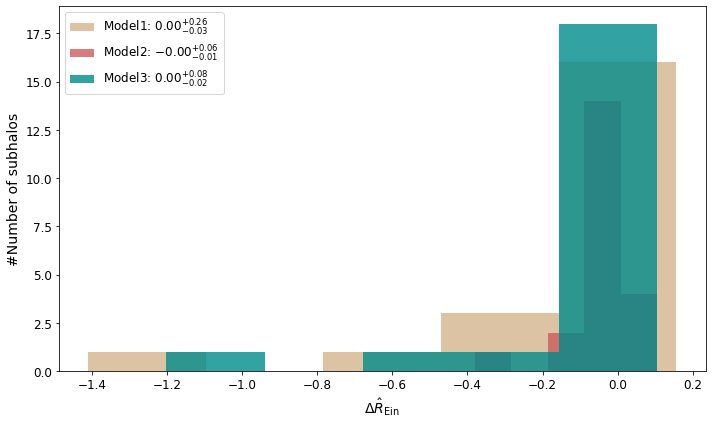

In [20]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Adicionar os dados aos subplots
    # Einstein radius
    
#Model1
m, hi, lo = median_hi_lo( Model1_Re[:,1] )    
axs.hist(Model1_Re[:,1], bins=5, density=False,  color="tan", alpha=0.8,
                      label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

#Model2
m, hi, lo = median_hi_lo( Model2_Re[:,1] )    
axs.hist(Model2_Re[:,1],  bins=5, density=False, color="indianred", alpha=0.8,
                      label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

#Model3
m, hi, lo = median_hi_lo( Model3_Re[:,1] )    
axs.hist(Model3_Re[:,1],  bins=5, density=False, color="darkcyan", alpha=0.8,
                      label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))



axs.set_ylabel("#Number of subhalos", size=14)
axs.set_xlabel(r"${\Delta \hat{R}_{\rm Ein}}$", size=14)
axs.legend(fontsize=12)


# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

---